In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

from tqdm import tqdm
import os 

tqdm.pandas()

# my Helper functions

from HelperFunctions import *

import xgboost as xgb 
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import yellowbrick.model_selection as ms

In [3]:
landsat_training_data = pd.read_csv('../Datasets/landsat_features_training.csv')
terra_climate_training_data = pd.read_csv('../Datasets/terraclimate_features_training.csv')
explained_variables = pd.read_csv('../Datasets/water_quality_training_dataset.csv')

joined_explaining_vars = combine_two_datasets(landsat_training_data, terra_climate_training_data)
full_dataset = combine_two_datasets(joined_explaining_vars, explained_variables)

full_dataset

target_columns = ['Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus']
feature_columns = full_dataset.columns.drop(target_columns + ['Sample Date', 'Latitude', 'Longitude'])

Feature_data = full_dataset[feature_columns]
#Target_data = full_dataset[target_columns]

Target_data = full_dataset[target_columns]


X_train_val, X_test, y_train_val, y_test = train_test_split(Feature_data, Target_data, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15)


X_train

,nir,green,swir16,swir22,NDMI,MNDWI,pet
2351,9831.5,9626.5,7804.00,7590.00,0.114967,0.104558,164.10000
6805,14183.0,9801.0,13704.25,11265.25,0.021549,-0.167901,176.10000
5259,14183.0,9801.0,13704.25,11265.25,0.021549,-0.167901,156.70000
7098,20396.5,9620.0,14787.50,11160.50,0.159419,-0.211718,166.90001
4891,14183.0,9801.0,13704.25,11265.25,0.021549,-0.167901,173.70000
...,...,...,...,...,...,...,...
6898,14130.0,10522.0,17121.00,14047.50,-0.095709,-0.238722,158.70000
8514,13394.0,8359.0,9970.00,8451.00,0.146550,-0.087894,154.60000
9038,14183.0,9801.0,13704.25,11265.25,0.021549,-0.167901,177.00000
2978,15975.5,10120.0,16067.50,12355.00,-0.002871,-0.227112,160.70000


## Learning Curve ( see overfitting )

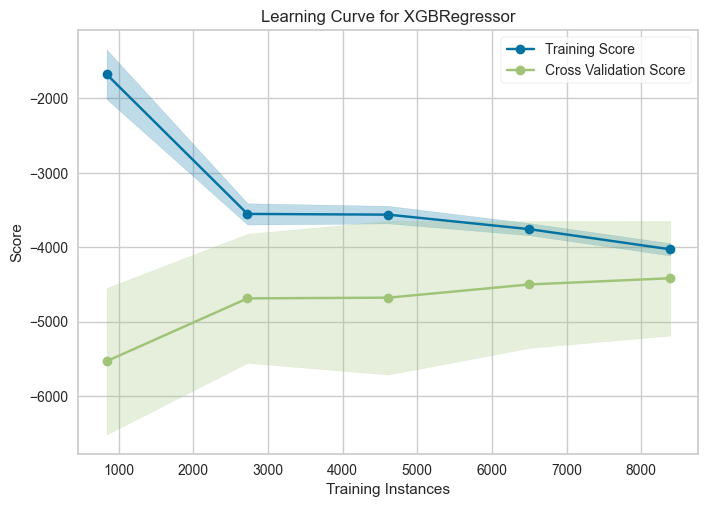

In [9]:
_ = ms.learning_curve(boost_predicter, Feature_data, Target_data, scoring='neg_mean_squared_error', cv=10)

## Feature Importance

<Axes: >

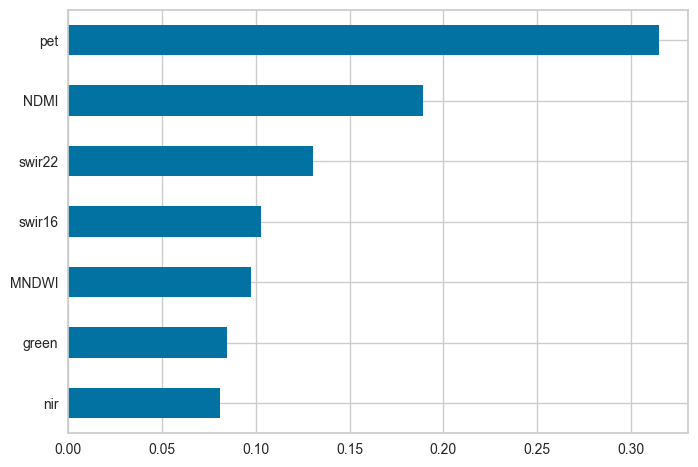

In [10]:
(pd.Series(boost_predicter.feature_importances_, index = X_train.columns).sort_values().plot.barh())

In [267]:
dart_xgb = xgb.XGBRegressor(objective ='reg:squarederror',
                            booster='dart',
                            learning_rate = 0.05, # bom
                            max_depth = 4, # bom, muda comforme adicionar dados 
                            n_estimators = 110, # bom, muda conforme adicionar dados
                            subsample = 0.6,
                            colsample_bytree = 0.8,
                            min_child_weight=2.0, ## fixado assim, bom
                            gamma=1.0,  ## fixado assim, bom
                            verbosity = 1,
                            rate_drop = 0.25, # bom : 0.25
                            skip_drop = 0.5 # bom : 0.5
)

dart_xgb.fit(X_train, y_train,
            eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:202.84124
[1]	validation_0-rmse:202.12226


[2]	validation_0-rmse:199.99855
[3]	validation_0-rmse:199.37066
[4]	validation_0-rmse:197.45078
[5]	validation_0-rmse:195.68841
[6]	validation_0-rmse:195.19898
[7]	validation_0-rmse:194.68344
[8]	validation_0-rmse:194.64533
[9]	validation_0-rmse:194.31684
[10]	validation_0-rmse:193.93810
[11]	validation_0-rmse:193.89686
[12]	validation_0-rmse:193.45423
[13]	validation_0-rmse:193.26653
[14]	validation_0-rmse:193.12475
[15]	validation_0-rmse:191.67286
[16]	validation_0-rmse:191.56626
[17]	validation_0-rmse:191.52804
[18]	validation_0-rmse:191.43073
[19]	validation_0-rmse:191.04403
[20]	validation_0-rmse:190.94958
[21]	validation_0-rmse:190.54561
[22]	validation_0-rmse:190.45023
[23]	validation_0-rmse:189.20522
[24]	validation_0-rmse:188.15299
[25]	validation_0-rmse:188.08784
[26]	validation_0-rmse:187.70760
[27]	validation_0-rmse:187.69403
[28]	validation_0-rmse:186.75993
[29]	validation_0-rmse:186.70021
[30]	validation_0-rmse:185.72612
[31]	validation_0-rmse:185.68600
[32]	validation_0-

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,'dart'
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabete

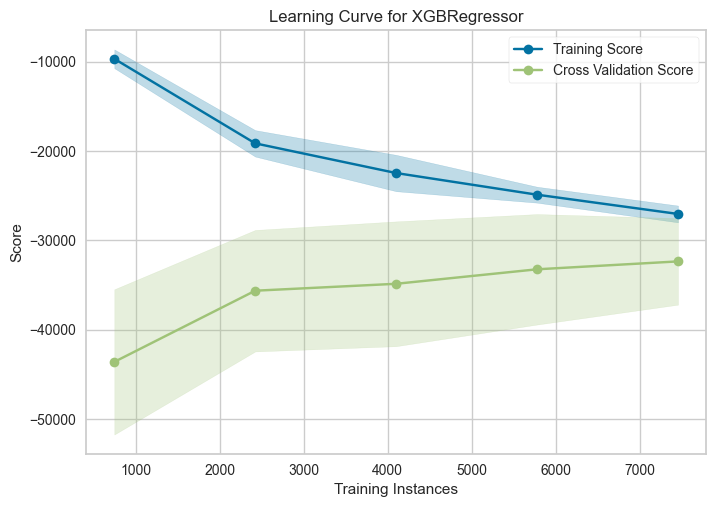

In [268]:
_ = ms.learning_curve(dart_xgb, Feature_data, Target_data, scoring='neg_mean_squared_error', cv=5)

<Axes: >

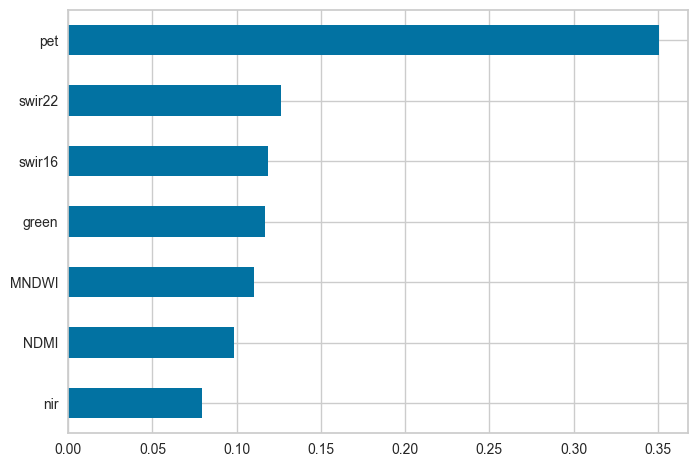

In [269]:
(pd.Series(dart_xgb.feature_importances_, index = X_train.columns).sort_values().plot.barh())

In [270]:
evaluate_model(dart_xgb.predict(X_train), y_train, "train evaluation")
evaluate_model(dart_xgb.predict(X_test), y_test, "test evaluation")
evaluate_model(dart_xgb.predict(X_val), y_val, "validation evaluation")


train evaluation Evaluation:
R²: 0.305
RMSE: 166.607

test evaluation Evaluation:
R²: 0.291
RMSE: 172.845

validation evaluation Evaluation:
R²: 0.272
RMSE: 171.159


(array([[136.7311  , 723.5375  ,  43.01325 ],
        [149.96353 , 626.03754 ,  27.120897],
        [162.40442 , 663.24646 ,  26.614634],
        ...,
        [ 92.33179 , 310.70062 ,  22.692478],
        [142.4203  , 576.754   ,  54.846672],
        [111.42566 , 476.97635 ,  56.224422]], dtype=float32),
 0.2719544470310211,
 np.float64(171.15855793130825))

## Submission

In [271]:
submission_landsat_data = pd.read_csv("../Datasets/landsat_features_validation.csv")
submission_terra_climate_data = pd.read_csv("../Datasets/terraclimate_features_validation.csv")
all_submission_data = combine_two_datasets(submission_landsat_data, submission_terra_climate_data)
all_submission_data


,Latitude,Longitude,Sample Date,nir,green,swir16,swir22,NDMI,MNDWI,pet
0,-32.043333,27.822778,01-09-2014,15229.0,12868.0,14797.0,12421.0,0.014388,-0.069727,161.900010
1,-33.329167,26.077500,16-09-2015,14525.5,9493.5,12425.5,9973.0,0.081427,-0.130571,177.600000
2,-32.991639,27.640028,07-05-2015,16221.0,9304.5,12536.5,9958.0,0.128123,-0.147979,158.400010
3,-34.096389,24.439167,07-02-2012,14525.5,9493.5,12425.5,9973.0,0.081427,-0.130571,130.000000
4,-32.000556,28.581667,01-10-2014,9125.0,11100.5,9455.0,8711.0,-0.017761,0.080052,152.500000
...,...,...,...,...,...,...,...,...,...,...
195,-33.771111,25.386667,06-12-2012,17562.0,9492.0,13559.5,10235.0,0.128609,-0.176453,171.400010
196,-33.185361,27.390750,04-09-2014,15883.0,9083.5,12135.5,9484.0,0.133751,-0.143833,159.400010
197,-32.043333,27.822778,28-09-2015,13619.5,10046.5,13105.0,10969.0,0.019252,-0.132108,168.600000
198,-33.001667,25.161389,08-01-2015,13955.5,10670.0,17303.5,14835.5,-0.107105,-0.237135,81.200005


In [272]:
X_pred_input_features_columns = all_submission_data.columns.drop(['Latitude', 'Longitude', 'Sample Date'])
X_pred_input_features = all_submission_data[X_pred_input_features_columns]

y_submission_pred = dart_xgb.predict(X_pred_input_features)
y_submission_pred

array([[111.366104, 380.45523 ,  28.76216 ],
       [135.1902  , 563.06335 ,  63.516308],
       [ 79.108925, 482.73718 ,  38.130848],
       [ 81.019356, 270.2089  ,  24.712807],
       [ 97.39498 , 323.6173  ,  25.8397  ],
       [142.723   , 543.67474 ,  39.562576],
       [ 94.464516, 301.5834  ,  24.399437],
       [ 96.66519 , 354.47003 ,  26.257648],
       [ 98.60103 , 304.28967 ,  26.755919],
       [102.249   , 382.55865 ,  38.53022 ],
       [ 55.84734 , 344.92188 ,  33.47518 ],
       [ 70.942276, 391.11627 ,  31.448198],
       [ 65.11425 , 191.58104 ,  16.93809 ],
       [ 96.459755, 335.37332 ,  26.579239],
       [ 76.22751 , 252.4706  ,  19.398335],
       [127.659355, 552.8597  ,  42.01389 ],
       [ 69.59663 , 449.21478 ,  28.942116],
       [136.13936 , 553.7295  ,  45.967667],
       [112.7062  , 337.38055 ,  23.883776],
       [110.16148 , 355.24744 ,  27.73132 ],
       [114.19589 , 368.2889  ,  31.339647],
       [ 78.51152 , 279.51373 ,  25.335049],
       [13

In [273]:
predicted_values_pd = pd.DataFrame({
    'Total Alkalinity': y_submission_pred[:, 0], 
    'Electrical Conductance': y_submission_pred[:, 1], 
    'Dissolved Reactive Phosphorus': y_submission_pred[:, 2]
})

predicted_pd = pd.DataFrame({
    'Latitude': all_submission_data['Latitude'].values,
    'Longitude': all_submission_data['Longitude'].values,
    'Sample Date': all_submission_data['Sample Date'].values,
})
predicted_pd = pd.concat([predicted_pd, predicted_values_pd], axis=1)
predicted_pd


,Latitude,Longitude,Sample Date,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus
0,-32.043333,27.822778,01-09-2014,111.366104,380.455231,28.762159
1,-33.329167,26.077500,16-09-2015,135.190201,563.063354,63.516308
2,-32.991639,27.640028,07-05-2015,79.108925,482.737183,38.130848
3,-34.096389,24.439167,07-02-2012,81.019356,270.208893,24.712807
4,-32.000556,28.581667,01-10-2014,97.394981,323.617310,25.839701
...,...,...,...,...,...,...
195,-33.771111,25.386667,06-12-2012,144.164169,513.504883,55.043098
196,-33.185361,27.390750,04-09-2014,76.826836,411.795563,30.971844
197,-32.043333,27.822778,28-09-2015,131.118484,477.488953,40.395451
198,-33.001667,25.161389,08-01-2015,109.200111,518.499390,43.437153


In [263]:
predicted_pd.to_csv("../Results/submission_predictions_boosted.csv", index=False)